# Missing Values y Outliers

In [2]:
# Load Libraries
%matplotlib inline
import numpy as np
import pandas as pd 
import seaborn as sns

## Dataset

Leamos el dataset a utilizar. 

In [3]:
# Load the dataset 
dat = pd.read_csv("../datasets/userbase.csv", sep='|', decimal=',')
dat

,"user;""booking_date"";""origin_airport"";""price"";""sales channel"";""company"";""user_country"";""index"""
0,"user5;2018-11-01;""MAD"";58,2000007629;""online"";..."
1,"user7;2018-11-01;""DUB"";147,5;""online"";""I2"";NA;2"
2,"user4;2018-11-02;""TFS"";24,0499992371;""online"";..."
3,"user8;2018-10-29;""MAD"";59,7099990845;""online"";..."
4,"user7;2018-11-01;""LPA"";37,2999992371;""call cen..."
...,...
995,"user2;2018-11-01;""JMK"";99,8499984741;""online"";..."
996,"user10;2018-11-01;""SVQ"";34,6100006104;""online""..."
997,"user4;2018-10-30;""MAD"";49,8800010681;""online"";..."
998,"user10;2018-11-02;""CDG"";152,960006714;""online""..."


El fichero esta vez tiene un separador distinto, usa el ';' en lugar de '|'.

In [4]:
# Load the dataset 
dat = pd.read_csv("../datasets/userbase.csv", sep=';', decimal=',')
dat

,user,booking_date,origin_airport,price,sales channel,company,user_country,index
0,user5,2018-11-01,MAD,58.200001,online,I2,NaN,1
1,user7,2018-11-01,DUB,147.500000,online,I2,NaN,2
2,user4,2018-11-02,TFS,24.049999,online,I2,NaN,3
3,user8,2018-10-29,MAD,59.709999,online,I2,NaN,4
4,user7,2018-11-01,LPA,37.299999,call center,I2,NaN,5
...,...,...,...,...,...,...,...,...
995,user2,2018-11-01,JMK,99.849998,online,I2,NaN,996
996,user10,2018-11-01,SVQ,34.610001,online,I2,NaN,997
997,user4,2018-10-30,MAD,49.880001,online,I2,NaN,998
998,user10,2018-11-02,CDG,152.960007,online,I2,NaN,999


Échamos un vistazo rápido a su contenido mediante el método *describe*.

In [5]:
dat.describe(include = 'all')

,user,booking_date,origin_airport,price,sales channel,company,user_country,index
count,1000,1000,1000,986.000000,1000,1000,10,1000.000000
unique,10,6,52,NaN,3,1,1,NaN
top,user9,2018-11-01,MAD,NaN,online,I2,Spain,NaN
freq,114,732,502,NaN,626,1000,10,NaN
mean,NaN,NaN,NaN,84.574006,NaN,NaN,NaN,500.500000
std,NaN,NaN,NaN,118.087017,NaN,NaN,NaN,288.819436
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,34.815001,NaN,NaN,NaN,250.750000
50%,NaN,NaN,NaN,58.065001,NaN,NaN,NaN,500.500000
75%,NaN,NaN,NaN,104.414999,NaN,NaN,NaN,750.250000


## Missing Values

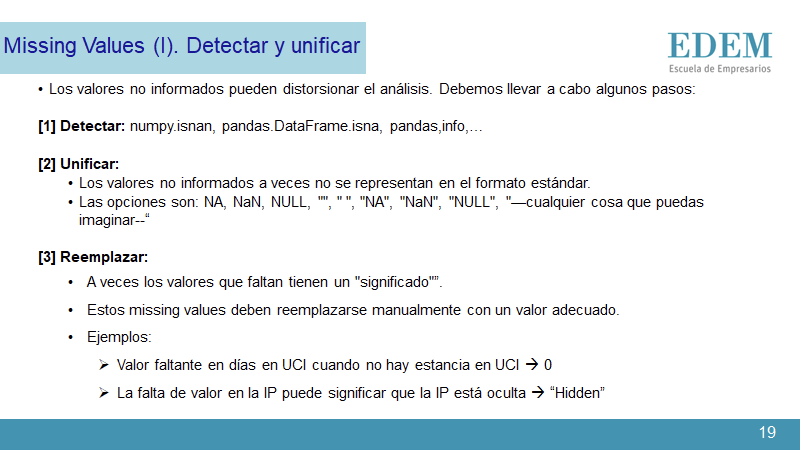

Podemos ver información de los missing values con el método *info*.

In [14]:
dat.info?

In [15]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user            1000 non-null   object 
 1   booking_date    1000 non-null   object 
 2   origin_airport  1000 non-null   object 
 3   price           986 non-null    float64
 4   sales channel   1000 non-null   object 
 5   company         1000 non-null   object 
 6   user_country    10 non-null     object 
 7   index           1000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


Tenemos missing values en la columna *price* y *user_country*. ¿Cómo los manejamos?

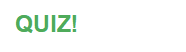

## Outliers

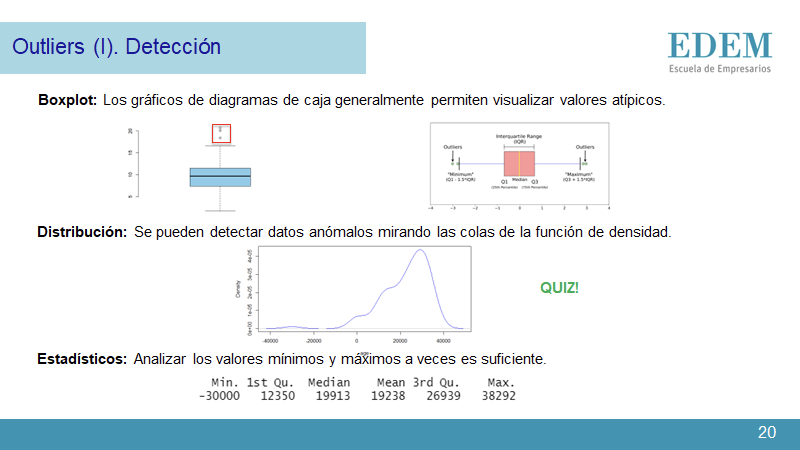

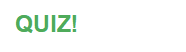

Analicemos el boxplot.

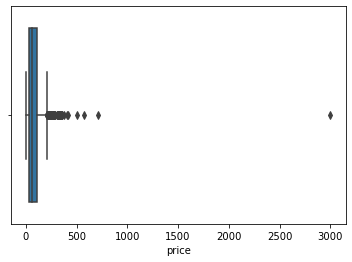

In [45]:
sns.boxplot(x = dat.price)
plt.show()

Y la función de densidad.

C:\Users\jesus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

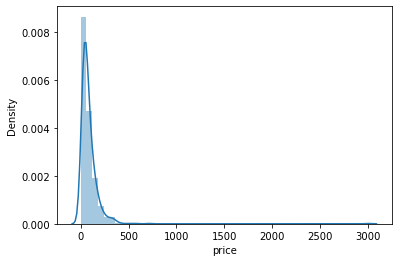

In [48]:
sns.distplot(dat.price)

Ahora volvamos a fijarnos en el descriptivo de los datos.

In [46]:
dat.describe(include = [np.number])

,price,index
count,986.000000,1000.000000
mean,84.574006,500.500000
std,118.087017,288.819436
min,0.000000,1.000000
25%,34.815001,250.750000
50%,58.065001,500.500000
75%,104.414999,750.250000
max,3000.480000,1000.000000


Podemos calcular exactamente cuáles son nuestros valores outliers.

In [52]:
Q3 = 104.41
Q1 = 34.81
IQR = (Q3-Q1)
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Lower bound = " + str(lower_bound))
print("Upper bound = " + str(upper_bound))

Lower bound = -69.58999999999999
Upper bound = 208.81


Solo tenemos outliers "por arriba".

In [60]:
upper_outliers = dat.price > upper_bound
upper_outliers = [i for i, x in enumerate(upper_outliers) if x]
print(upper_outliers)

[20, 30, 42, 49, 64, 81, 135, 138, 175, 178, 191, 207, 233, 236, 246, 267, 288, 334, 337, 341, 375, 388, 404, 407, 433, 439, 443, 452, 467, 473, 481, 492, 519, 531, 542, 544, 547, 549, 576, 596, 633, 650, 666, 669, 683, 689, 694, 702, 709, 735, 743, 803, 812, 816, 828, 831, 841, 850, 920, 943, 959, 980]


In [65]:
dat.price[upper_outliers]

20     3000.480000
30      310.619995
42      211.229996
49      251.199997
64      234.910004
          ...     
850     220.039993
920     304.380005
943     266.739990
959     288.750000
980     208.910004
Name: price, Length: 62, dtype: float64

¿Cómo manejamos estos outliers?

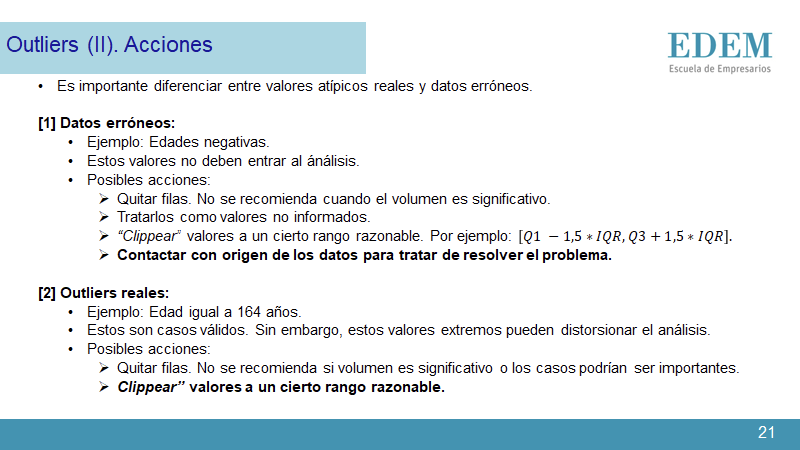

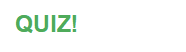

Vamos a optar por "clippear" los valores.

In [66]:
dat.price.values[upper_outliers] = upper_bound

Vemos el resultado final.

In [67]:
dat.price[upper_outliers]

20     208.81
30     208.81
42     208.81
49     208.81
64     208.81
        ...  
850    208.81
920    208.81
943    208.81
959    208.81
980    208.81
Name: price, Length: 62, dtype: float64

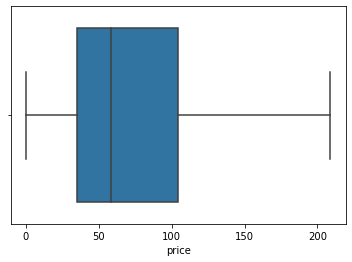

In [68]:
sns.boxplot(x = dat.price)
plt.show()